This is an ipynb file which allows us to analyse data accross several entities containing data under same headings. It plots violin plots and error bar plots along with side by side comparitive plots.

** Disclaimer: ChatGpt was used in correcting the code and assissting in small parts **

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.transforms import ScaledTranslation
from PIL import Image
import io

# Sample data: amplitudes for 7 moths (each moth has multiple amplitudes)
male_GH_2_day_old_20_06_2024 = {'ff_amplitude(left)':[54.356,56.746,56.086], 'w_amplitude(left)' : [8.606,8.621,8.119,11.502], 'ff_frequency(left)': [34.468,33.003,33.171], 'w_frequency(left)':[33.684,34.364,31.333,37.442], 'ff_amplitude(right)' : [55.739,57.608,56.7], 'w_amplitude(right)' : [7.719,7.339,6.738,10.562], 'ff_frequency(right)' : [33.693,33.003,33.171], 'w_frequency(right)' : [33.684,34.364,31.333,37.442]}
male_GH_1_day_old_02_07_2024 = {'ff_amplitude(left)':[66.262,55.03,56.71,58.622], 'w_amplitude(left)' : [0.0,0.0,0.0], 'ff_frequency(left)': [38.389,32.870,39.067], 'w_frequency(left)':[0.0,0.0,0.0], 'ff_amplitude(right)' : [73.418,77.608,76.387,69.467], 'w_amplitude(right)' : [0.0,0.0,0.0], 'ff_frequency(right)' : [38.341,33.887,39.163], 'w_frequency(right)' : [0.0,0.0,0.0]}
male_wild_2_day_old_04_07_2024 = {'ff_amplitude(left)':[85.996,76.632,78.245], 'w_amplitude(left)' : [0.0,0.0,0.0], 'ff_frequency(left)': [33.112,30.982,29.627], 'w_frequency(left)':[0.0,0.0,0.0], 'ff_amplitude(right)' : [89.872,80.721,79.219], 'w_amplitude(right)' : [0.0,0.0,0.0], 'ff_frequency(right)' : [33.112,30.982,29.627], 'w_frequency(right)' : [0.0,0.0,0.0]}
male_wild_3_day_old_05_07_2024 = {'ff_amplitude(left)':[77.675,75.982,75.982,64.42,83.552,82.211], 'w_amplitude(left)' : [15.28,16.716,16.716,16.116,17.258,18.352], 'ff_frequency(left)': [30.845,31.496,29.581,29.833,29.833,29.665], 'w_frequency(left)':[30.345,31.827,28.839,28.071,28.071,28.273], 'ff_amplitude(right)' : [82.286,88.991,88.991,86.036,91.651,88.921], 'w_amplitude(right)' : [20.704,24.594,24.594,23.169,24.246,25.285], 'ff_frequency(right)' : [30.845,31.496,29.581,29.833,29.833,29.665], 'w_frequency(right)' : [30.345,31.827,28.903,28.071,28.071,28.273]}
female_wild_2_day_old_10_07_2024 = {'ff_amplitude(left)':[41.757,51.874,44.191], 'w_amplitude(left)' : [11.652,10.934,10.4], 'ff_frequency(left)': [27.448,28.804,31.563], 'w_frequency(left)':[28.829,27.562,25.657], 'ff_amplitude(right)' : [70.189,61.395,108.454], 'w_amplitude(right)' : [11.978,10.974,10.953], 'ff_frequency(right)' : [27.448,28.755,31.563], 'w_frequency(right)' : [28.831,27.562,25.657]}
female_wild_2_day_old_26_07_2024 = {'ff_amplitude(left)':[58.452,68.476,52.835], 'w_amplitude(left)' : [0.0,0.0,0.0], 'ff_frequency(left)': [28.271,26.387,27.109], 'w_frequency(left)':[0.0,0.0,0.0], 'ff_amplitude(right)' : [64.54,62.726,64.558], 'w_amplitude(right)' : [0.0,0.0,0.0], 'ff_frequency(right)' : [28.271,26.387,27.109], 'w_frequency(right)' : [0.0,0.0,0.0]}
male_wild_2_day_old_26_07_2024 = {'ff_amplitude(left)':[75.843,67.043,66.005], 'w_amplitude(left)' : [0.0,0.0,0.0], 'ff_frequency(left)': [30.159,29.094,29.433], 'w_frequency(left)':[0.0,0.0,0.0], 'ff_amplitude(right)' : [85.782,81.424,76.852], 'w_amplitude(right)' : [0.0,0.0,0.0], 'ff_frequency(right)' : [29.675,29.627,29.433], 'w_frequency(right)' : [0.0,0.0,0.0]}

In [3]:
keys = ['ff_amplitude(left)', 'w_amplitude(left)', 'ff_frequency(left)', 'w_frequency(left)', 'ff_amplitude(right)', 'w_amplitude(right)', 'ff_frequency(right)', 'w_frequency(right)']
moths_v1 = [male_GH_2_day_old_20_06_2024, male_GH_1_day_old_02_07_2024, male_wild_2_day_old_04_07_2024, male_wild_3_day_old_05_07_2024, female_wild_2_day_old_10_07_2024, female_wild_2_day_old_26_07_2024, male_wild_2_day_old_26_07_2024]
data = np.array([[]])
for key in keys :
    for moth in moths_v1 :
        data = np.append(data, np.mean(moth[key]))
        #data[keys].append(np.mean(moth[key]))
# print(data)

In [4]:
ff_amplitude_left = data[0:7]
w_amplitude_left = data[7:14]
ff_frequency_left = data[14:21]
w_frequency_left = data[21:28]
ff_amplitude_right = data[28:35]
w_amplitude_right = data[35:42]
ff_frequency_right = data[42:49]
w_frequency_right = data[49:56]

In [5]:
moths_n1 = ["male_GH_2_day_old_20_06_2024", "male_GH_1_day_old_02_07_2024", "male_wild_2_day_old_04_07_2024", "male_wild_3_day_old_05_07_2024", "female_wild_2_day_old_10_07_2024", "female_wild_2_day_old_26_07_2024", "male_wild_2_day_old_26_07_2024"]
color = ['red', 'blue', 'green', 'yellow', 'cyan', 'orange', 'purple']

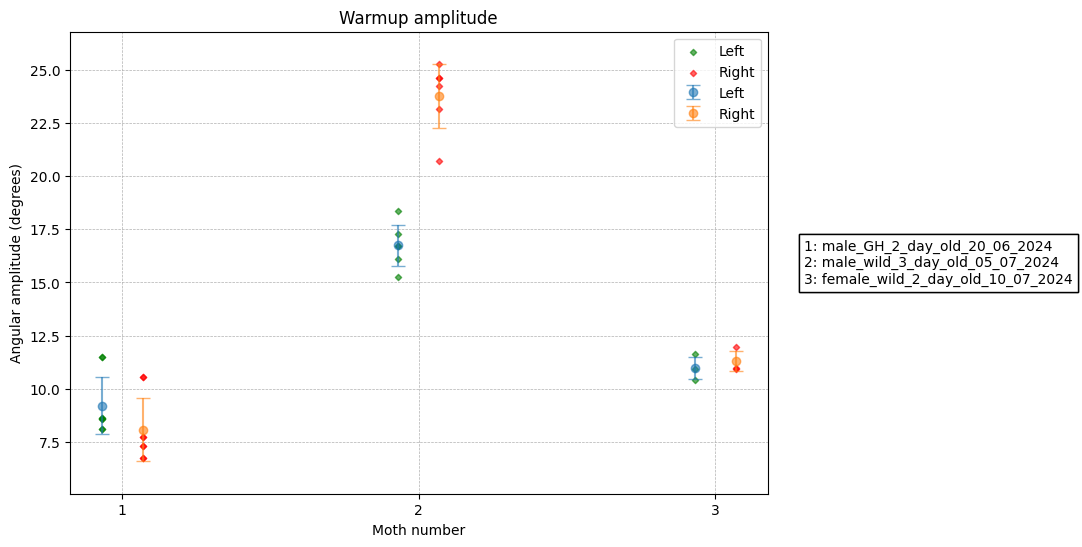

In [5]:
def plot_data(key_val, nature, title):
    moths_v=moths_v1.copy()
    moths_n=moths_n1.copy()
    for i in key_val :
        means = [[np.mean(moth[keys[key_val[0]]]) for moth in moths_v], [np.mean(moth[keys[key_val[1]]]) for moth in moths_v]]
        std_devs = [[np.std(moth[keys[key_val[0]]]) for moth in moths_v], [np.std(moth[keys[key_val[1]]]) for moth in moths_v]]

    fig, ax = plt.subplots(figsize = (9,6))  # Adjust figure size

    mean_val= []
    std_val = []
    non_zero_moths_allkeys = []
    non_zero_moths_n_allkeys = []
    offsets = [-5/72,5/72]
    for key in key_val:
        newmeans = []
        newstd_devs = []
        labels = ['Left', 'Right']
        # Filter moths 
        non_zero_moths = []
        non_zero_moths_n = []
        j = key_val.index(key)
        for i, moth in enumerate(moths_v):
            if any(v != 0.0 for v in moth[keys[key]]):
                non_zero_moths.append(moths_v[i])
                non_zero_moths_n.append(moths_n[i])
                newmeans.append(means[j][i])
                newstd_devs.append(std_devs[j][i])
        mean_val.append(newmeans)
        std_val.append(newstd_devs)
        non_zero_moths_allkeys.append(non_zero_moths)
        non_zero_moths_n_allkeys.append(non_zero_moths_n)
        color = [ 'black','Green', 'red', 'blue', 'orange' ]
        for i, moth in enumerate(non_zero_moths_allkeys[j]):
            y_values = moth[keys[key]]
            x_values = np.full(len(y_values), i)  # x-position for each moth
            ax.scatter(x_values+offsets[j], y_values, marker='D', color=color[j+1], alpha=0.6, s=10)

        for i, moth in enumerate(non_zero_moths_allkeys[j][0:1]):
            y_values = moth[keys[key]]
            x_values = np.full(len(y_values), i)  # x-position for each moth
            ax.scatter(x_values+offsets[j], y_values, marker='D', color=color[j+1], alpha=0.6,label=labels[j],s=10)

        # Plot error bars (Mean ± SD)
    for i, (y, yerr, offset) in enumerate(zip(mean_val, std_val, offsets)):
        ax.errorbar(np.arange(len(non_zero_moths_n))+offset, y, yerr=yerr, marker="o", linestyle="none", label= labels[i], capsize=5, alpha=0.6)

        joint_set_mean = mean_val[0]+mean_val[1]
        joint_set_std = std_val[0]+std_val[1]

        max_mean_index = joint_set_mean.index(max(joint_set_mean))
        plt.ylim(min(joint_set_mean) - 2* joint_set_std[max_mean_index], max(joint_set_mean) + 2*(joint_set_std[max_mean_index]))
        
        text_str = '\n'.join([f'{i+1}: {non_zero_moths_n[i]}' for i in range(len(non_zero_moths_n))])

        mid_point = (max(joint_set_mean) + min(joint_set_mean))/2
        # Add text box to the right of the plot (vertically stacked)
        # need to calibrate the x-coordinate of the text box accourding to the plot
        plt.text(len(non_zero_moths)-0.7,mid_point, text_str, fontsize=10,
                verticalalignment='center', horizontalalignment='left',
                bbox=dict(facecolor='white', alpha=1))
        plt.xticks(range(len(non_zero_moths_n)), range(1, len(non_zero_moths_n) + 1))
        plt.legend()
        plt.title(f"{title}")
        if nature == 'frequency':
            plt.ylabel("Frequency (Hz)")
        else:
            plt.ylabel("Angular amplitude (degrees)")
        plt.xlabel("Moth number")
        plt.legend()
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.savefig(f'all_moths_errorbarplot_{title}.tiff', dpi = 300,bbox_inches='tight')    

plot_data([1,5], 'amplitude', 'Warmup amplitude')



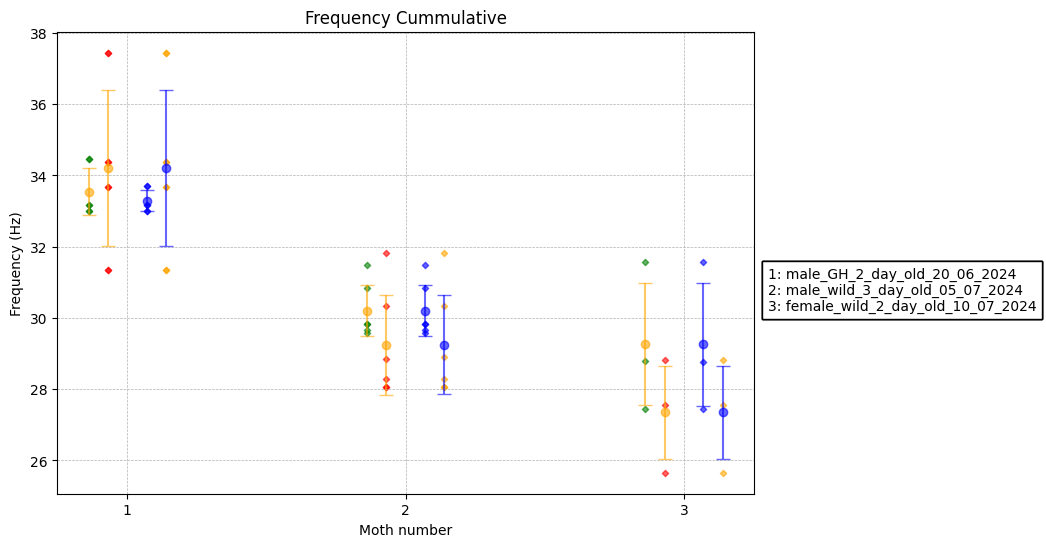

In [6]:
def plot_data(key_val, nature, title):
    # key_val = [0, 1, 4, 5]
    # nature = 'amplitude'
    # title = 'Warmup amplitude'
    moths_v=moths_v1.copy()
    moths_n=moths_n1.copy()
    means = []
    std_devs = []
    for key_index in key_val:
        mean = [np.mean(moth[keys[key_index]]) for moth in moths_v]
        std_dev = [np.std(moth[keys[key_index]]) for moth in moths_v]
        means.append(mean)
        std_devs.append(std_dev)
    # print(means)
    fig, ax = plt.subplots(figsize = (9,6))  # Adjust figure size

    mean_val= []
    std_val = []
    non_zero_moths_allkeys = []
    non_zero_moths_n_allkeys = []
    offsets = [-10/72, -5/72, 5/72, 10/72][:len(key_val)]

    # moths with both warmup and fullflight data

    both_n = []
    both = []
    for i, moth in enumerate(moths_v1):
        for j in range(len(moths_n1)):
            if any(v == 0.0 for v in moth[keys[j]]):
                both_n.append(moths_n1[i])
                both.append(moths_v1[i])
                break
    moths_with_both = [item for item in moths_v1 if item not in both]
    moths_with_both_n = [item for item in moths_n1 if item not in both_n]
    # print(moths_with_both_n)
    for key in key_val:
        newmeans = []
        newstd_devs = []
        labels = ['Left','Left', 'Right','Right']
        j = key_val.index(key)
        for i, moth in enumerate(moths_with_both_n):
            k = moths_n1.index(moths_with_both_n[i])
            newmeans.append(means[j][k])
            newstd_devs.append(std_devs[j][k])
        mean_val.append(newmeans)
        std_val.append(newstd_devs)
        # print(mean_val)
    color = [ 'black','Green', 'red', 'blue', 'orange' ]
    for i, moth in enumerate(moths_with_both):
        # print(moths_with_both_n[i])
        for j in range(min(len(key_val), len(offsets))):  # Ensure j does not exceed the length of key_val or offsets
            y_values = moth[keys[key_val[j]]]
            x_values = np.full(len(y_values), i)  # x-position for each moth
            # print(y_values)
            # print(x_values + offsets[j])
            scatter1 = ax.scatter(x_values + offsets[j], y_values, marker='D', color=color[j+1], alpha=0.6, s=10, label = keys[key_val[j]]) #label=labels[j]
        
    for i, moth in enumerate(moths_with_both[0:1]):
        for j in range(len(offsets)):  # Ensure j does not exceed the length of offsets
            y_values = moth[keys[key_val[j]]]
            x_values = np.full(len(y_values), i)  # x-position for each moth # x-position for each moth
            scatter_1 = ax.scatter(x_values+offsets[j], y_values, marker='D', color=color[j+1], alpha=0.6, s=10, label = keys[key_val[j]]) #label=labels[j]
        # plt.legend()
        # Plot error bars (Mean ± SD)
    for i, (y, yerr, offset) in enumerate(zip(mean_val, std_val, offsets)):
        colors = ['orange','orange', 'blue', 'blue']
        ax.errorbar(np.arange(len(moths_with_both_n))+offset, y, yerr=yerr, marker="o", linestyle="none", label= labels[i], color = colors[i], capsize=5, alpha=0.6)

        joint_set_mean = mean_val[0]+mean_val[1]
        joint_set_std = std_val[0]+std_val[1]

        max_mean_index = joint_set_mean.index(max(joint_set_mean))
        # plt.ylim(min(joint_set_mean) - 2* joint_set_std[max_mean_index], max(joint_set_mean) + 2*(joint_set_std[max_mean_index]))
        
        text_str = '\n'.join([f'{i+1}: {moths_with_both_n[i]}' for i in range(len(moths_with_both_n))])

        mid_point = (max(joint_set_mean) + min(joint_set_mean))/2
        # Add text box to the right of the plot (vertically stacked)
        # need to calibrate the x-coordinate of the text box accourding to the plot
        plt.text(len(moths_with_both)-0.7,mid_point, text_str, fontsize=10,
                verticalalignment='center', horizontalalignment='left',
                bbox=dict(facecolor='white', alpha=1))
        plt.xticks(range(len(moths_with_both_n)), range(1, len(moths_with_both_n) + 1))

        plt.title(f"{title}")
        if nature == 'frequency':
            plt.ylabel("Frequency (Hz)")
        else:
            plt.ylabel("Angular amplitude (degrees)")
        plt.xlabel("Moth number")

        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        # plt.savefig(f'all_moths_errorbarplot_{title}.tiff', dpi = 300,bbox_inches='tight')    

plot_data([2, 3, 6, 7], 'frequency', 'Frequency Cummulative')



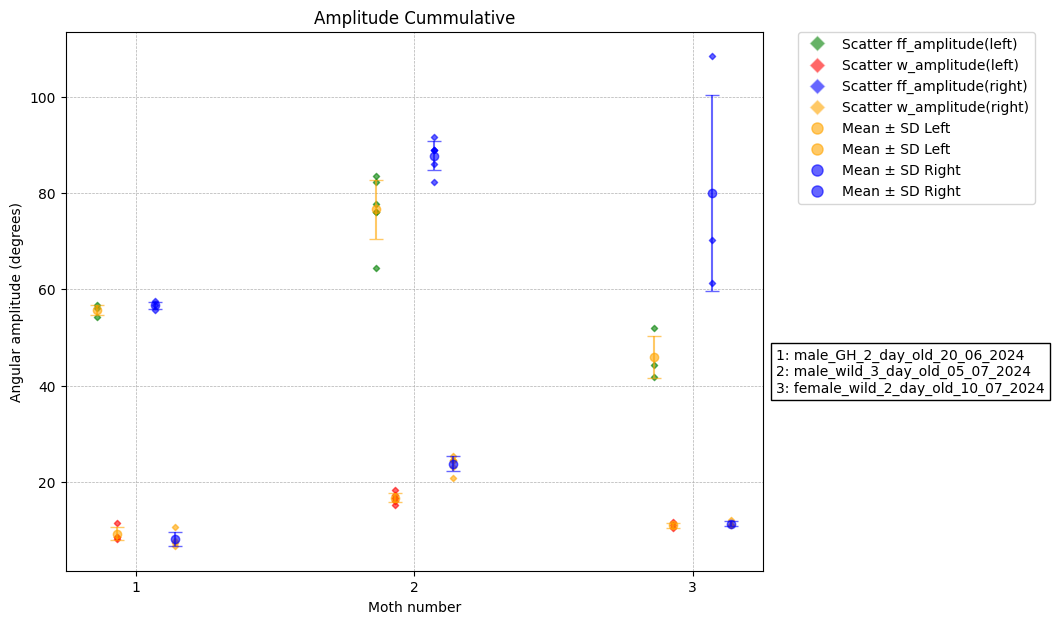

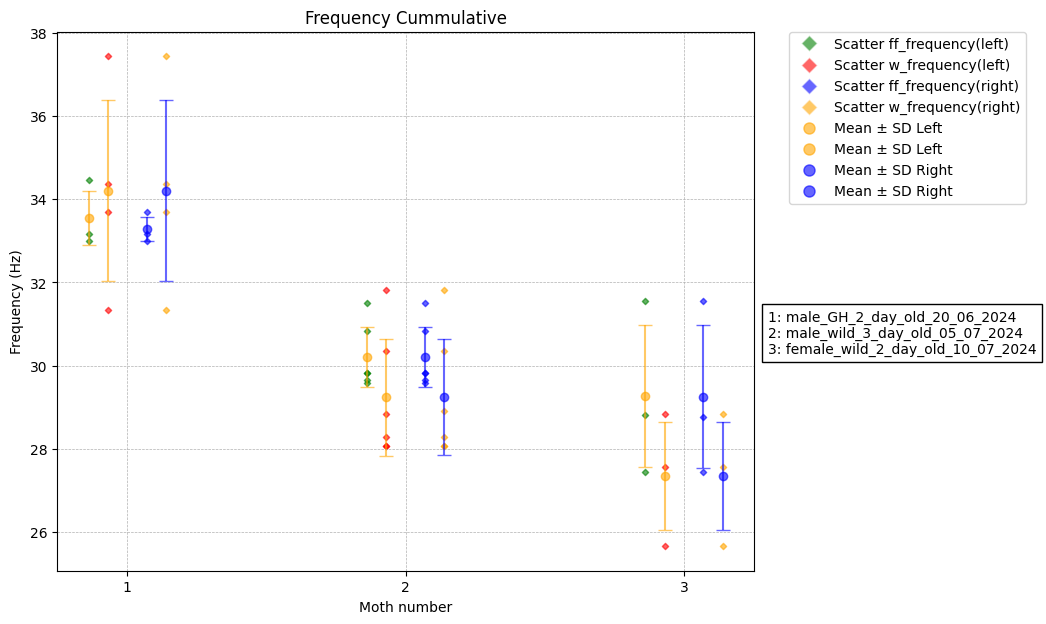

In [7]:
## This code is for plotting the data of moths with both warmup and fullflight data
## this code was not used in the final version of the presentation, but it is kept here for reference
## the skeleton of this code was writtern by me and the beautification was done by ChatGPT

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def plot_data(key_val, nature, title):
    moths_v = moths_v1.copy()
    moths_n = moths_n1.copy()
    means = []
    std_devs = []

    for key_index in key_val:
        mean = [np.mean(moth[keys[key_index]]) for moth in moths_v]
        std_dev = [np.std(moth[keys[key_index]]) for moth in moths_v]
        means.append(mean)
        std_devs.append(std_dev)

    fig, ax = plt.subplots(figsize=(9, 7))

    mean_val = []
    std_val = []
    offsets = [-10/72, -5/72, 5/72, 10/72][:len(key_val)]

    both_n = []
    both = []
    for i, moth in enumerate(moths_v1):
        for j in range(len(moths_n1)):
            if any(v == 0.0 for v in moth[keys[j]]):
                both_n.append(moths_n1[i])
                both.append(moths_v1[i])
                break

    moths_with_both = [item for item in moths_v1 if item not in both]
    moths_with_both_n = [item for item in moths_n1 if item not in both_n]

    for key in key_val:
        newmeans = []
        newstd_devs = []
        labels = ['Left', 'Left', 'Right', 'Right']
        j = key_val.index(key)
        for i, moth in enumerate(moths_with_both_n):
            k = moths_n1.index(moths_with_both_n[i])
            newmeans.append(means[j][k])
            newstd_devs.append(std_devs[j][k])
        mean_val.append(newmeans)
        std_val.append(newstd_devs)

    color = ['black', 'green', 'red', 'blue', 'orange']
    labels = ['Left', 'Left', 'Right', 'Right']  # Assuming this stays the same
    colors = ['orange', 'orange', 'blue', 'blue']

    # Scatter plots (no labels)
    for i, moth in enumerate(moths_with_both):
        for j in range(min(len(key_val), len(offsets))):
            y_values = moth[keys[key_val[j]]]
            x_values = np.full(len(y_values), i)
            ax.scatter(x_values + offsets[j], y_values, marker='D', color=color[j+1], alpha=0.6, s=10)

    # Error bars (Mean ± SD)
    for i, (y, yerr, offset) in enumerate(zip(mean_val, std_val, offsets)):
        ax.errorbar(np.arange(len(moths_with_both_n)) + offset, y, yerr=yerr,
                    marker="o", linestyle="none", color=colors[i], capsize=5, alpha=0.6)

    # Text box of moth names
    joint_set_mean = mean_val[0] + mean_val[1]
    joint_set_std = std_val[0] + std_val[1]
    max_mean_index = joint_set_mean.index(max(joint_set_mean))
    text_str = '\n'.join([f'{i+1}: {moths_with_both_n[i]}' for i in range(len(moths_with_both_n))])
    mid_point = (max(joint_set_mean) + min(joint_set_mean)) / 2

    plt.text(len(moths_with_both) - 0.7, mid_point, text_str, fontsize=10,
             verticalalignment='center', horizontalalignment='left',
             bbox=dict(facecolor='white', alpha=1))

    plt.xticks(range(len(moths_with_both_n)), range(1, len(moths_with_both_n) + 1))
    plt.title(f"{title}")

    if nature == 'frequency':
        plt.ylabel("Frequency (Hz)")
    else:
        plt.ylabel("Angular amplitude (degrees)")

    plt.xlabel("Moth number")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Manually create legend handles
    scatter_handles = [
        Line2D([0], [0], marker='D', color='w', label=f'Scatter {keys[k]}',
               markerfacecolor=color[i+1], markersize=8, alpha=0.6)
        for i, k in enumerate(key_val)
    ]

    errorbar_handles = [
        Line2D([0], [0], marker='o', color=colors[i], label=f'Mean ± SD {labels[i]}',
               linestyle='None', markersize=8, alpha=0.6)
        for i in range(len(key_val))
    ]

    legend_handles = scatter_handles + errorbar_handles
    ax.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    # plt.savefig(f'all_moths_errorbarplot_{title}.tiff', dpi=300, bbox_inches='tight')

plot_data([0, 1, 4, 5], 'amplitude', 'Amplitude Cummulative')
plot_data([2, 3, 6, 7], 'frequency', 'Frequency Cummulative')


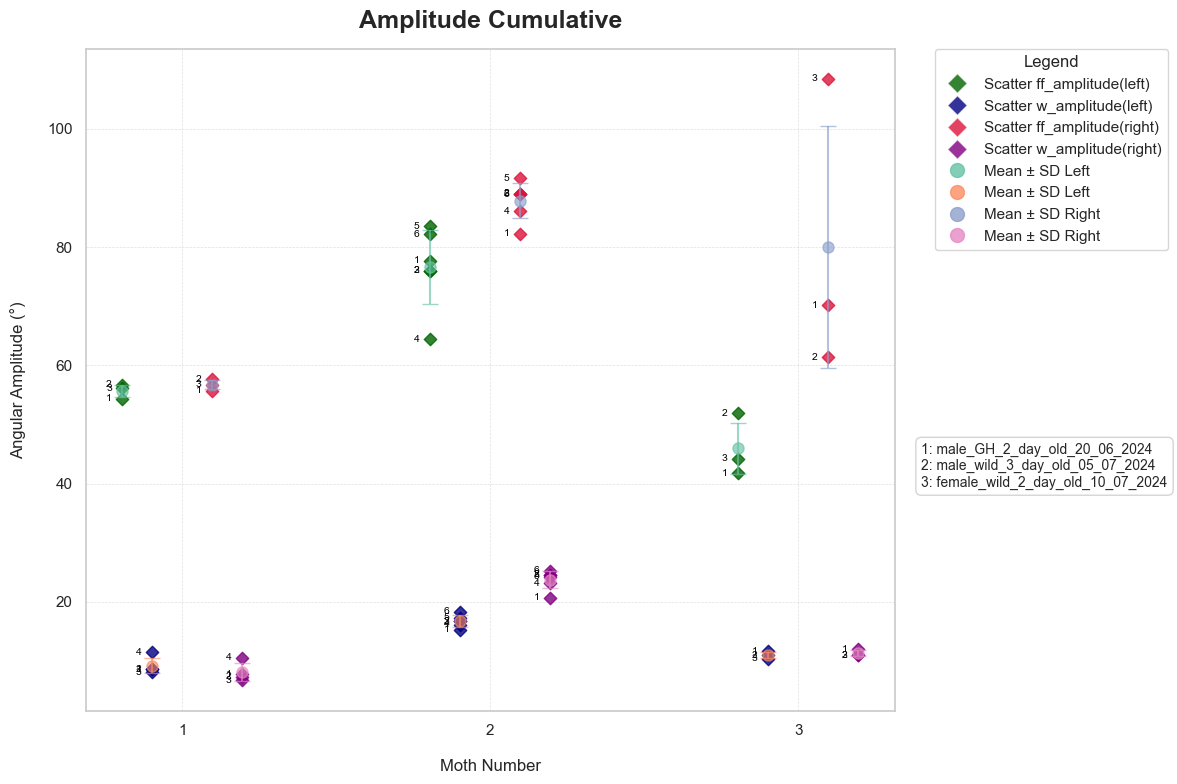

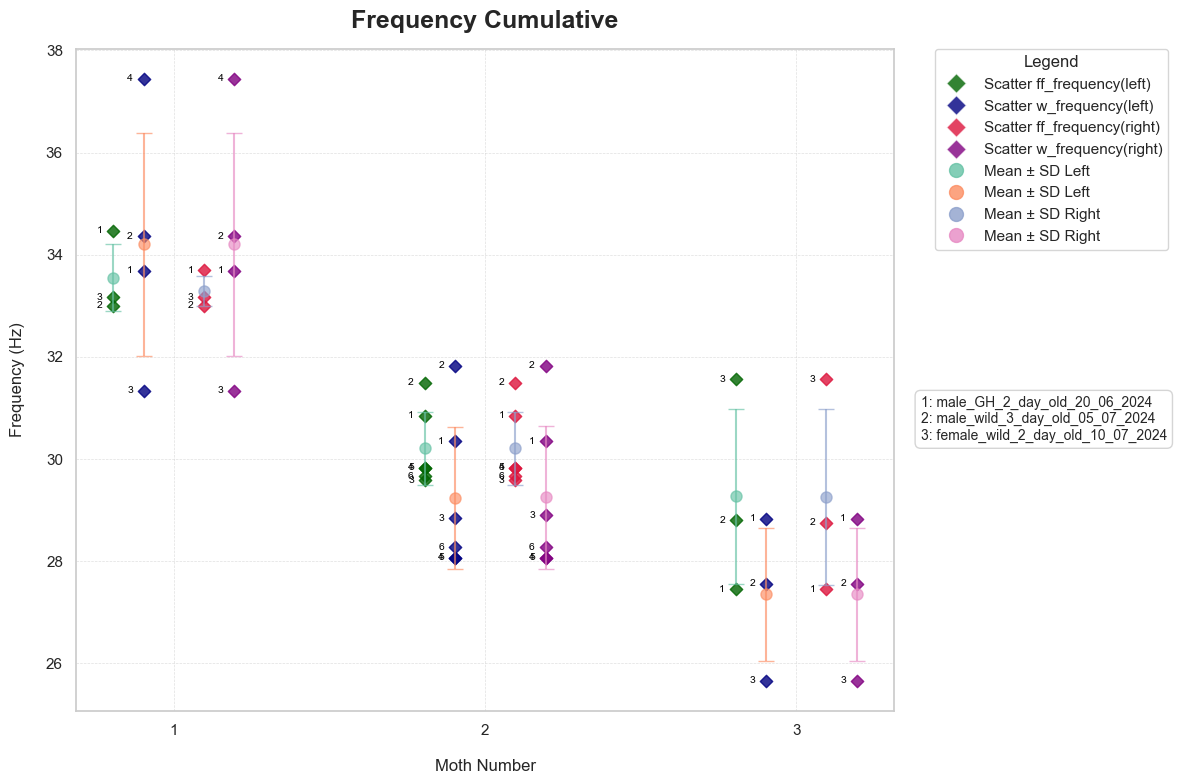

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

# Use seaborn for styling
sns.set(style='whitegrid', context='notebook')

def plot_data(key_val, nature, title):
    moths_v = moths_v1.copy()
    moths_n = moths_n1.copy()
    means = []
    std_devs = []

    for key_index in key_val:
        mean = [np.mean(moth[keys[key_index]]) for moth in moths_v]
        std_dev = [np.std(moth[keys[key_index]]) for moth in moths_v]
        means.append(mean)
        std_devs.append(std_dev)

    fig, ax = plt.subplots(figsize=(12, 8))

    mean_val = []
    std_val = []
    offsets = [-14/72, -7/72, 7/72, 14/72][:len(key_val)]

    both_n = []
    both = []
    for i, moth in enumerate(moths_v1):
        for j in range(len(moths_n1)):
            if any(v == 0.0 for v in moth[keys[j]]):
                both_n.append(moths_n1[i])
                both.append(moths_v1[i])
                break

    moths_with_both = [item for item in moths_v1 if item not in both]
    moths_with_both_n = [item for item in moths_n1 if item not in both_n]

    for key in key_val:
        newmeans = []
        newstd_devs = []
        j = key_val.index(key)
        for i, moth in enumerate(moths_with_both_n):
            k = moths_n1.index(moths_with_both_n[i])
            newmeans.append(means[j][k])
            newstd_devs.append(std_devs[j][k])
        mean_val.append(newmeans)
        std_val.append(newstd_devs)

    # Color scheme
    scatter_colors = sns.color_palette("Set2")
    error_colors = ['#006400', '#000080', '#DC143C', '#800080'] 
    labels = ['Left', 'Left', 'Right', 'Right']

    # Plot scatter points
    for i, moth in enumerate(moths_with_both):
        for j in range(min(len(key_val), len(offsets))):
            y_values = moth[keys[key_val[j]]]
            x_values = np.full(len(y_values), i)
            ax.scatter(x_values + offsets[j], y_values, marker='D',
                       color=error_colors[j], alpha=0.8, s=40)
            for k, y in enumerate(y_values):
                ax.annotate(f"{k+1}", (x_values[k] + offsets[j]-3/69, y),ha='center', va='center', fontsize=7.5, color='black')

    # Error bars for means
    for i, (y, yerr, offset) in enumerate(zip(mean_val, std_val, offsets)):
        ax.errorbar(np.arange(len(moths_with_both_n)) + offset, y, yerr=yerr,
                    marker="o", linestyle="none", color=scatter_colors[i],
                    capsize=6, alpha=0.65, markersize=8)

    # Moth names in a styled text box
    joint_set_mean = mean_val[0] + mean_val[1]
    joint_set_std = std_val[0] + std_val[1]
    max_mean_index = joint_set_mean.index(max(joint_set_mean))
    text_str = '\n'.join([f'{i+1}: {moths_with_both_n[i]}' for i in range(len(moths_with_both_n))])
    mid_point = (max(joint_set_mean) + min(joint_set_mean)) / 2

    ax.text(len(moths_with_both) - 0.6, mid_point, text_str,
            fontsize=10, va='center', ha='left',
            bbox=dict(facecolor='white', edgecolor='lightgray', alpha=0.95, boxstyle='round,pad=0.4'))

    # Axis formatting
    ax.set_xticks(range(len(moths_with_both_n)))
    ax.set_xticklabels(range(1, len(moths_with_both_n) + 1))
    ax.set_xlabel("Moth Number", labelpad=15)
    ax.set_title(title, fontsize=18, weight='bold', pad=15)

    if nature == 'frequency':
        ax.set_ylabel("Frequency (Hz)", labelpad=15)
    else:
        ax.set_ylabel("Angular Amplitude (°)", labelpad=15)

    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

    # Custom legend
    scatter_handles = [
        Line2D([0], [0], marker='D', color='w', label=f'Scatter {keys[k]}',
               markerfacecolor=error_colors[i], markersize=10, alpha=0.8)
        for i, k in enumerate(key_val)
    ]

    errorbar_handles = [
        Line2D([0], [0], marker='o', color=scatter_colors[i], label=f'Mean ± SD {labels[i]}',
               linestyle='None', markersize=10, alpha=0.8)
        for i in range(len(key_val))
    ]

    ax.legend(handles=scatter_handles + errorbar_handles,
              loc='upper left', bbox_to_anchor=(1.05, 1),
              borderaxespad=0., title='Legend', frameon=True)

    plt.tight_layout()
    plt.savefig(f'trial_no_labelled_plot_{title}.tif', dpi=300, bbox_inches='tight')
    plt.show()


# Example calls
plot_data([0, 1, 4, 5], 'amplitude', 'Amplitude Cumulative')
plot_data([2, 3, 6, 7], 'frequency', 'Frequency Cumulative')


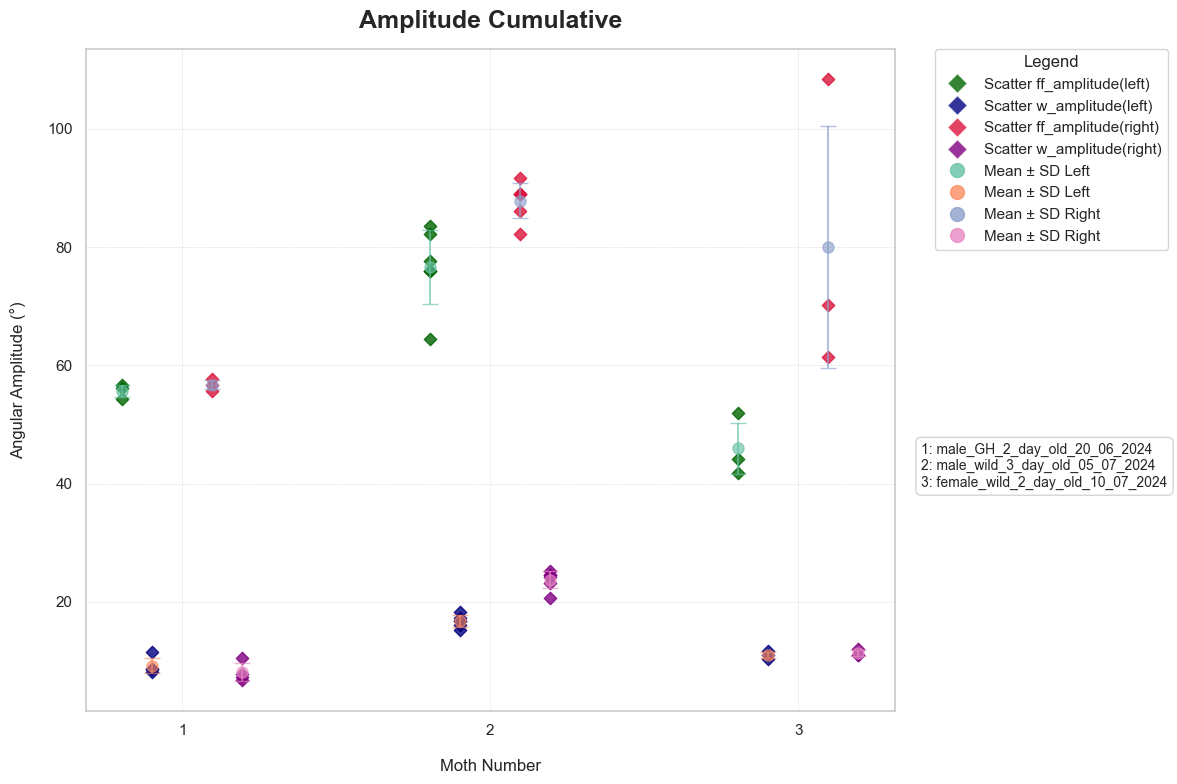

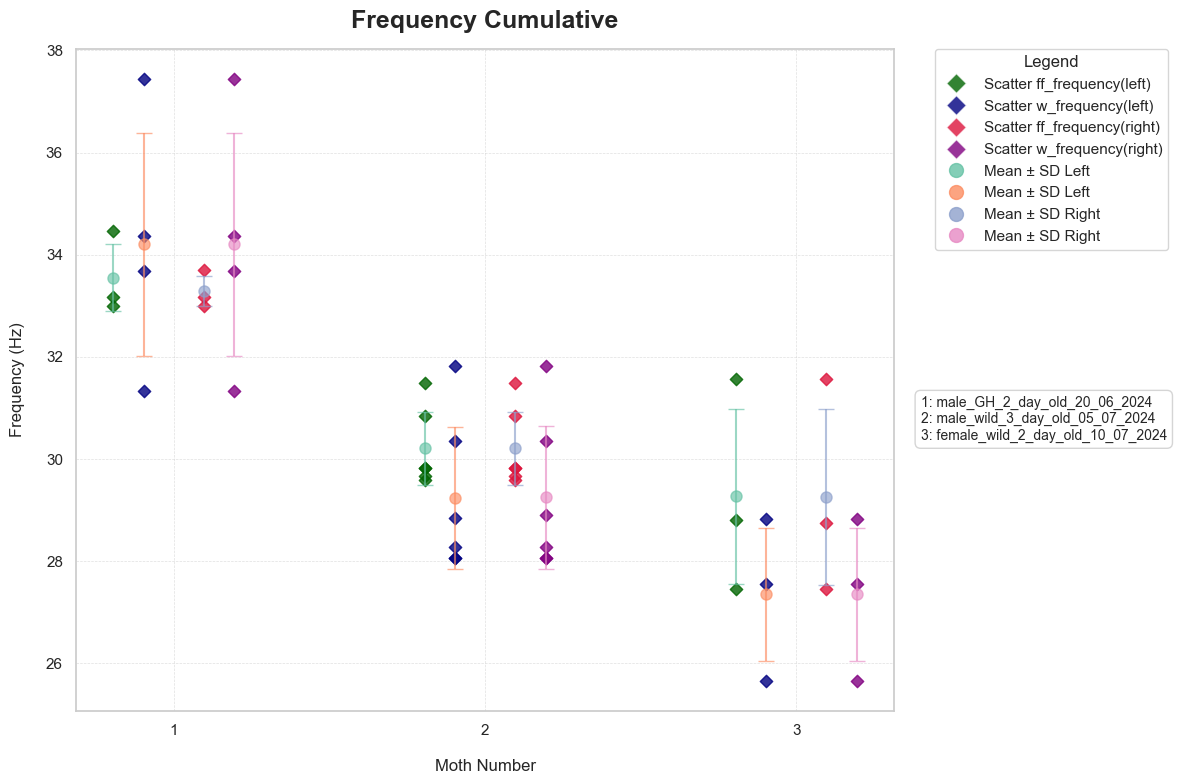

In [9]:
def plot_data(key_val, nature, title, label_points=False):
    moths_v = moths_v1.copy()
    moths_n = moths_n1.copy()
    means = []
    std_devs = []

    for key_index in key_val:
        mean = [np.mean(moth[keys[key_index]]) for moth in moths_v]
        std_dev = [np.std(moth[keys[key_index]]) for moth in moths_v]
        means.append(mean)
        std_devs.append(std_dev)

    fig, ax = plt.subplots(figsize=(12, 8))

    mean_val = []
    std_val = []
    offsets = [-14/72, -7/72, 7/72, 14/72][:len(key_val)]

    both_n = []
    both = []
    for i, moth in enumerate(moths_v1):
        for j in range(len(moths_n1)):
            if any(v == 0.0 for v in moth[keys[j]]):
                both_n.append(moths_n1[i])
                both.append(moths_v1[i])
                break

    moths_with_both = [item for item in moths_v1 if item not in both]
    moths_with_both_n = [item for item in moths_n1 if item not in both_n]

    for key in key_val:
        newmeans = []
        newstd_devs = []
        j = key_val.index(key)
        for i, moth in enumerate(moths_with_both_n):
            k = moths_n1.index(moths_with_both_n[i])
            newmeans.append(means[j][k])
            newstd_devs.append(std_devs[j][k])
        mean_val.append(newmeans)
        std_val.append(newstd_devs)

    scatter_colors = sns.color_palette("Set2")
    error_colors = ['#006400', '#000080', '#DC143C', '#800080']
    labels = ['Left', 'Left', 'Right', 'Right']

    for i, moth in enumerate(moths_with_both):
        for j in range(min(len(key_val), len(offsets))):
            y_values = moth[keys[key_val[j]]]
            x_values = np.full(len(y_values), i)
            ax.scatter(x_values + offsets[j], y_values, marker='D',
                       color=error_colors[j], alpha=0.8, s=40)

            if label_points:
                for k, y in enumerate(y_values):
                    if k == 0:  # only label first point to reduce clutter
                        ax.annotate(f"{k+1}", (x_values[k] + offsets[j] - 5/63, y),
                                    textcoords="offset points", xytext=(0, 5),
                                    ha='center', fontsize=8)

    for i, (y, yerr, offset) in enumerate(zip(mean_val, std_val, offsets)):
        ax.errorbar(np.arange(len(moths_with_both_n)) + offset, y, yerr=yerr,
                    marker="o", linestyle="none", color=scatter_colors[i],
                    capsize=6, alpha=0.65, markersize=8)

    joint_set_mean = mean_val[0] + mean_val[1]
    joint_set_std = std_val[0] + std_val[1]
    text_str = '\n'.join([f'{i+1}: {moths_with_both_n[i]}' for i in range(len(moths_with_both_n))])
    mid_point = (max(joint_set_mean) + min(joint_set_mean)) / 2

    ax.text(len(moths_with_both) - 0.6, mid_point, text_str,
            fontsize=10, va='center', ha='left',
            bbox=dict(facecolor='white', edgecolor='lightgray', alpha=0.95, boxstyle='round,pad=0.4'))

    ax.set_xticks(range(len(moths_with_both_n)))
    ax.set_xticklabels(range(1, len(moths_with_both_n) + 1))
    ax.set_xlabel("Moth Number", labelpad=15)
    ax.set_title(title, fontsize=18, weight='bold', pad=15)

    if nature == 'frequency':
        ax.set_ylabel("Frequency (Hz)", labelpad=15)
    else:
        ax.set_ylabel("Angular Amplitude (°)", labelpad=15)

    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

    scatter_handles = [
        Line2D([0], [0], marker='D', color='w', label=f'Scatter {keys[k]}',
               markerfacecolor=error_colors[i], markersize=10, alpha=0.8)
        for i, k in enumerate(key_val)
    ]

    errorbar_handles = [
        Line2D([0], [0], marker='o', color=scatter_colors[i], label=f'Mean ± SD {labels[i]}',
               linestyle='None', markersize=10, alpha=0.8)
        for i in range(len(key_val))
    ]

    ax.legend(handles=scatter_handles + errorbar_handles,
              loc='upper left', bbox_to_anchor=(1.05, 1),
              borderaxespad=0., title='Legend', frameon=True)

    plt.tight_layout()
    plt.savefig(f'plot_{title}.tiff', dpi=300, bbox_inches='tight')
    plt.show()
# Example calls
plot_data([0, 1, 4, 5], 'amplitude', 'Amplitude Cumulative')
plot_data([2, 3, 6, 7], 'frequency', 'Frequency Cumulative')

In [10]:
both = []
for i, moth in enumerate(moths_v1):
    for j in range(len(moths_n1)):
        if any(v == 0.0 for v in moth[keys[j]]):
            both.append(moths_n1[i])
            break
print("Moths with both warmup and fullflight data:", [item for item in moths_n1 if item not in both])

Moths with both warmup and fullflight data: ['male_GH_2_day_old_20_06_2024', 'male_wild_3_day_old_05_07_2024', 'female_wild_2_day_old_10_07_2024']


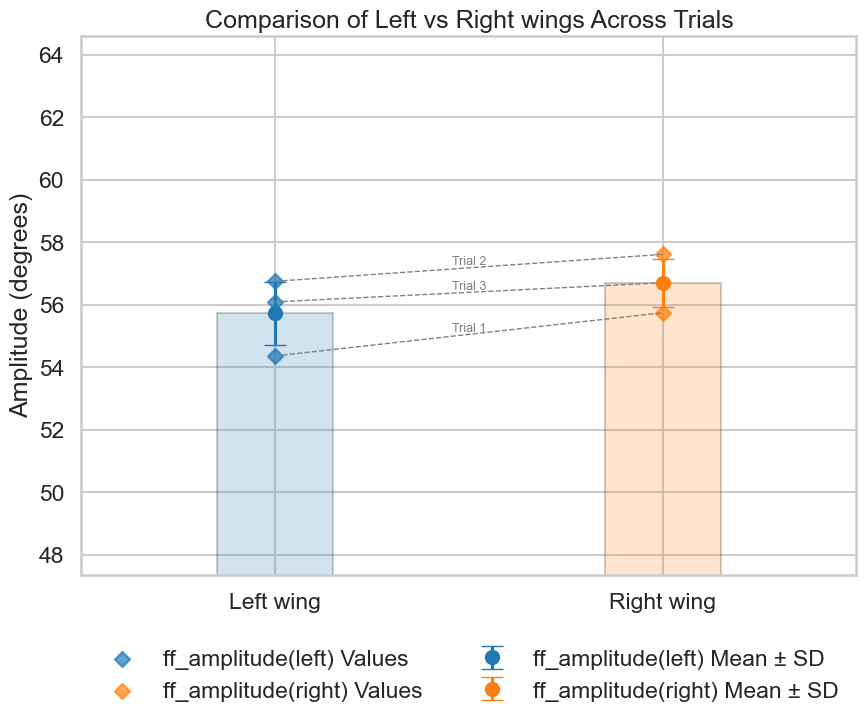

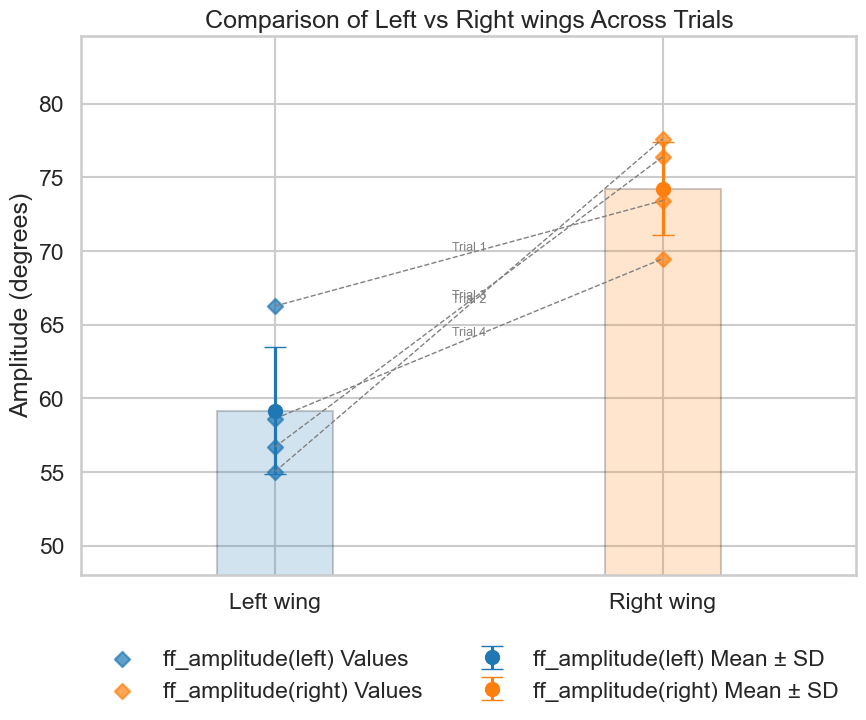

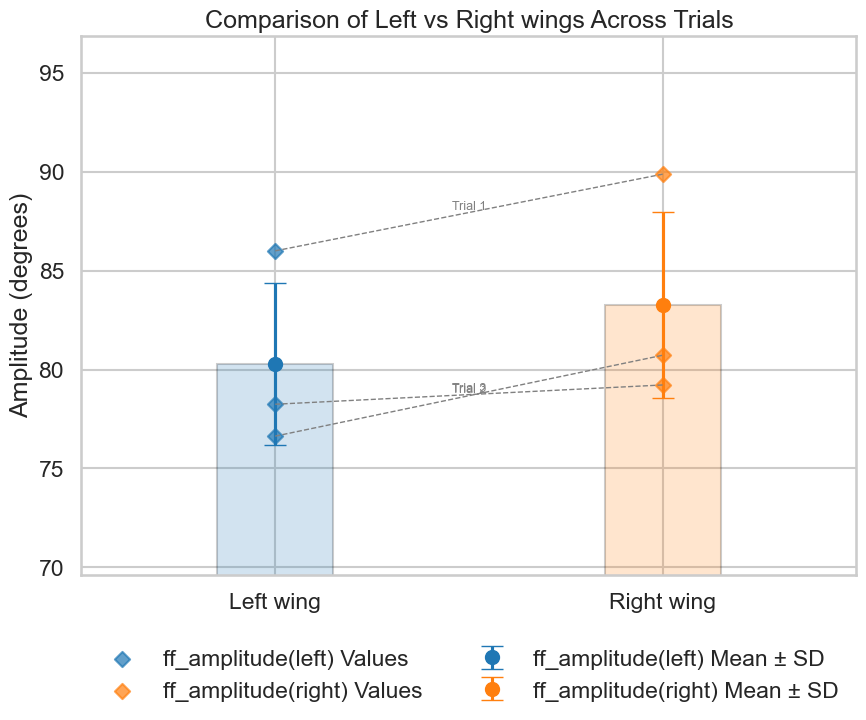

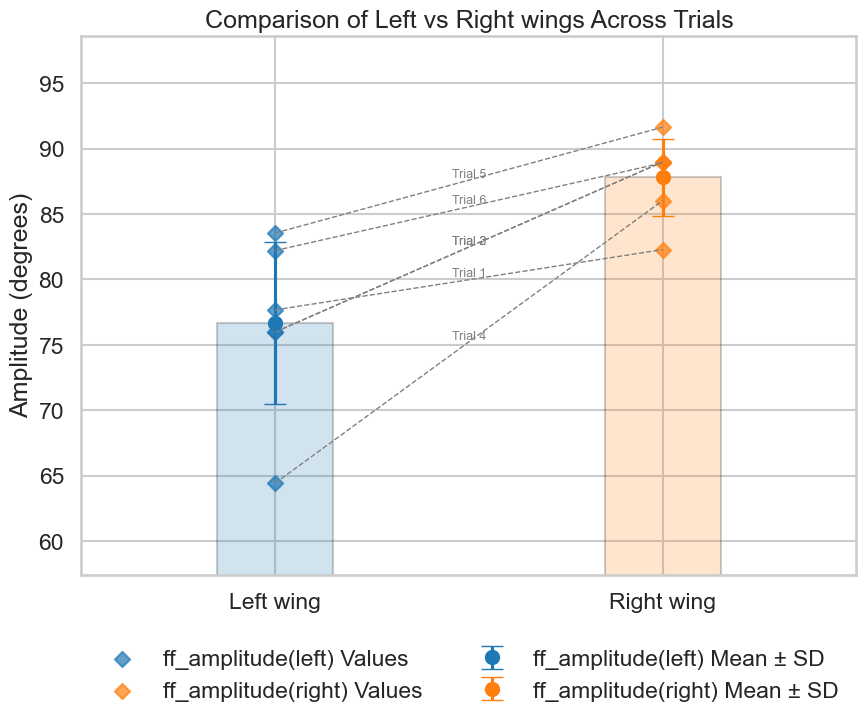

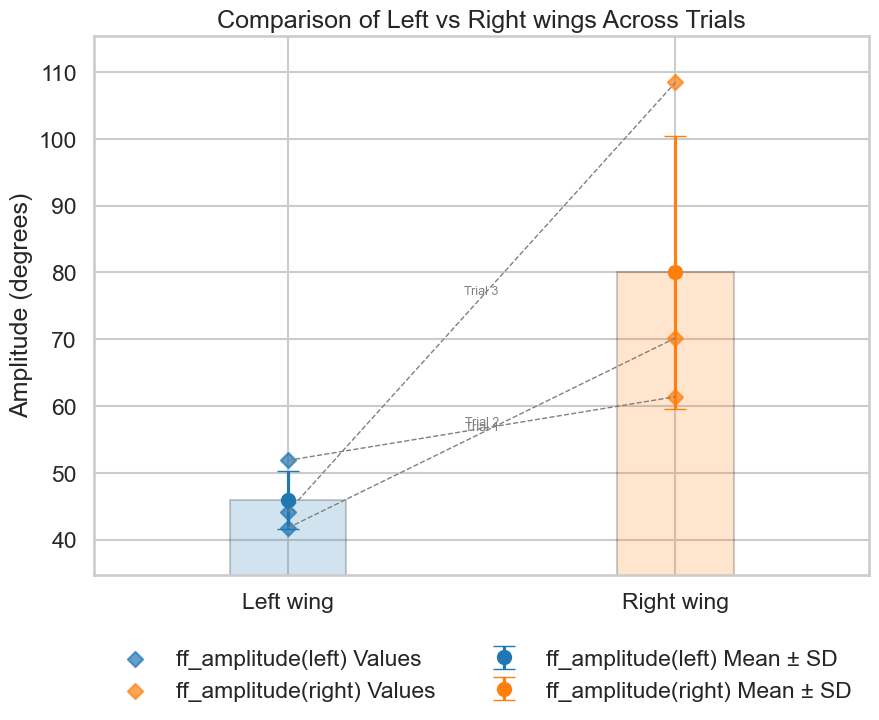

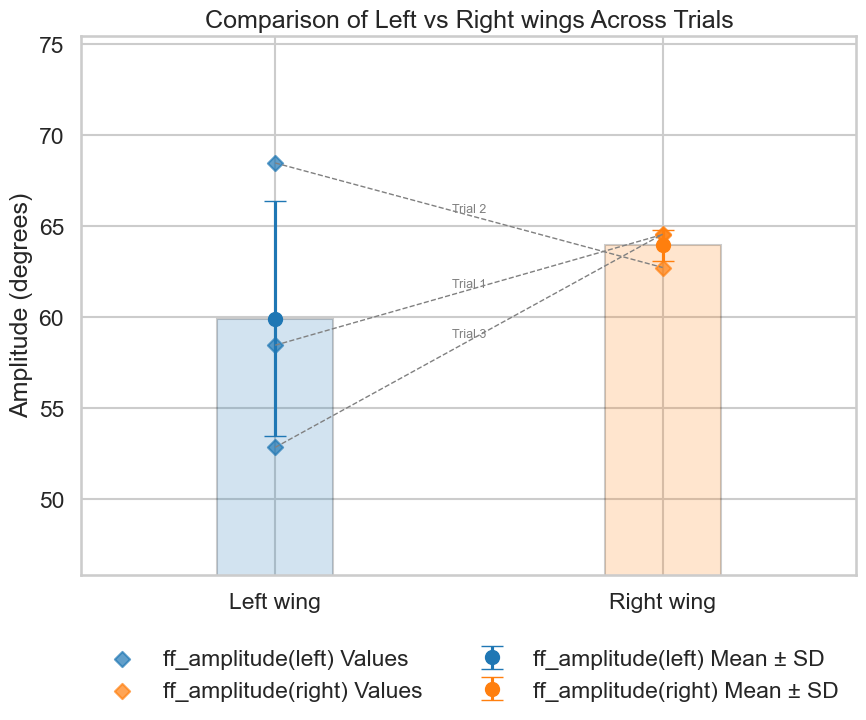

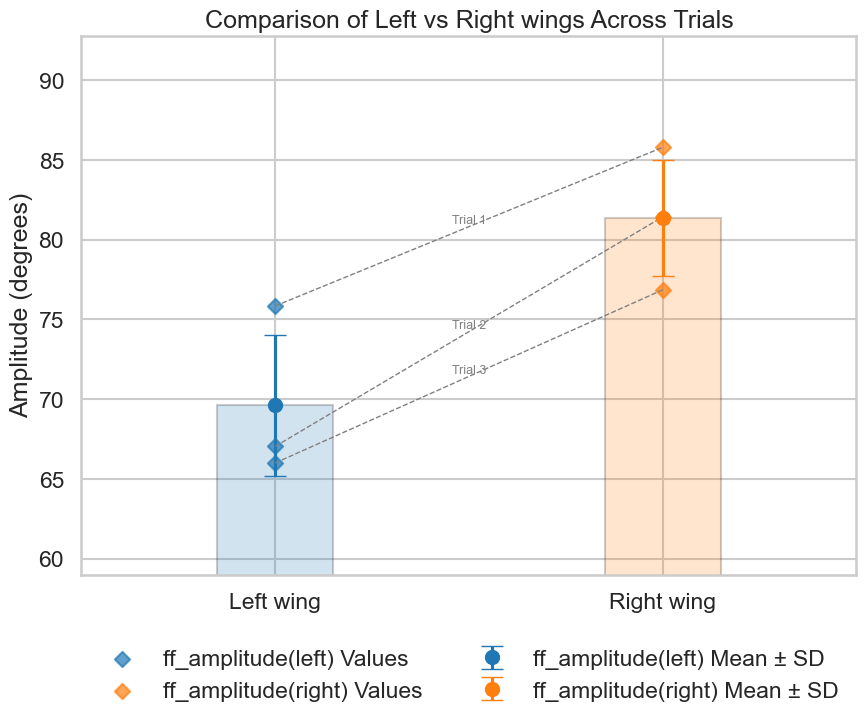

In [11]:
## The skeleton of the code was written on my own but the beautification and the final touches were done with the help of ChatGPT.

def leftvsright(moth_no, key_val) :
# Styling
    sns.set(style='whitegrid', context='talk')  # clean background and larger text
    colors = ['#1f77b4', '#ff7f0e']  # blue for Left, orange for Right

    # key_val = [1, 5]  # Left and Right wing

    moths_v = moths_v1.copy()
    moths_n = moths_n1.copy()

    moth = moths_v[moth_no]

    means = []
    std_devs = []

    for j in key_val:
        mean1 = [np.mean(moth[keys[j]])]
        std_dev1 = [np.std(moth[keys[j]])]
        means.append(mean1)
        std_devs.append(std_dev1)

    fig, ax = plt.subplots(figsize=(10, 7))  # Adjusted size

    # Plot bars and scatter points
    for i, key in enumerate(key_val):
        y_values = moth[keys[key]]
        x_values = np.full(len(y_values), i)

        # Plot semi-transparent bar for mean
        ax.bar(i, means[i], width=0.3, alpha=0.2, color=colors[i], edgecolor='black')

        # Scatter plot of all points
        scatter = ax.scatter(x_values, y_values, marker='D', s=60, alpha=0.7, color=colors[i], label=f'{keys[key]} Values')

        # Error bar for mean ± std
        errorbar = ax.errorbar(i, np.mean(y_values), yerr=np.std(y_values), fmt='o',
                            markersize=10, capsize=8, color=colors[i], label=f'{keys[key]} Mean ± SD')

    # Connect paired values with dashed lines
    for k in range(len(moth[keys[key_val[0]]])):
        x_line = [0, 1]
        y_start = moth[keys[key_val[0]]][k]
        y_end = moth[keys[key_val[1]]][k]
        y_line = [y_start, y_end]

        ax.plot(x_line, y_line, color='gray', linestyle='--', linewidth=1)

        # Annotate the trial in the middle
        x_mid = 0.5
        y_mid = (y_start + y_end) / 2
        ax.text(x_mid, y_mid, f'Trial {k+1}', fontsize=9, ha='center', va='bottom', color='gray')

    # Formatting
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Left wing', 'Right wing'])
    min1 = min(moth[keys[key_val[0]]])
    min2 = min(moth[keys[key_val[1]]])
    max1 = max(moth[keys[key_val[0]]])
    max2 = max(moth[keys[key_val[1]]])
    ax.set_ylim(min(min1, min2) - 7, max(max1, max2) + 7)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylabel('Amplitude (degrees)')
    # ax.set_xlabel('Wing')
    ax.set_title('Comparison of Left vs Right wings Across Trials')
    # bax = brokenaxes(ylims=((100, 110), (0, 1)), hspace=0.05)
    # Place legend outside the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False)
    plt.savefig(f'leftvsright_{moths_n1[moth_no]}_{keys[key_val[0]]}.tiff', dpi=300, bbox_inches='tight')
    # plt.tight_layout()
    plt.show()

for i in range(len(moths_v1)):
    leftvsright(i, [0, 4])
    # plt.savefig(f'leftvsright_{moths_n1[i]}_{keys[0]}.tiff', dpi=300, bbox_inches='tight')
    # leftvsright(i, [1, 5])
    # leftvsright(i, [2, 6])
    # leftvsright(i, [3, 7])  


In [12]:
# def violin_plot(moth_no, key, i):
#     data1 = moths_v[moth_no][keys[key]]
#     data2 = moths_v[moth_no][keys[key+1]]
#     plt.violinplot(data,positions = [i+1], showmeans=True, showmedians=False)
#     # plt.xticks([i], moths_n[i], rotation = 45)
#     # plt.title(title)

# plt.figure(figsize=(10, 5))

# for i in range(0, 7):
#     violin_plot(i, 2, i)
#     violin_plot(i, 3, i)
    
# plt.xticks([1,2,3,4,5,6,7], moths_n, rotation = 80)
# plt.title("Frequency of wings")
# plt.show()


In [13]:
# Violin plot for two groups
def violin_plot(moth_no, key, all_data):
    data1 = moths_v1[moth_no][keys[key]]
    data2 = moths_v1[moth_no][keys[key+1]]

    # Prepare DataFrame for seaborn
    df = pd.DataFrame({
        'value': data1 + data2,
        'group': ['A'] * len(data1) + ['B'] * len(data2),
        'moth_no': [moth_no] * (len(data1) + len(data2))  # Label for each plot
    })
    all_data.append(df)
    # print(df)
    # fig, ax = plt.subplots(figsize=(8, 6))
    # sns.violinplot(data=df, x=['Combined'] * len(df), y='value', hue='group', split=True, inner='quartile', ax=ax)

# Adjust legend
# ax.legend(title='Group', labels=[keys[2], keys[3]])


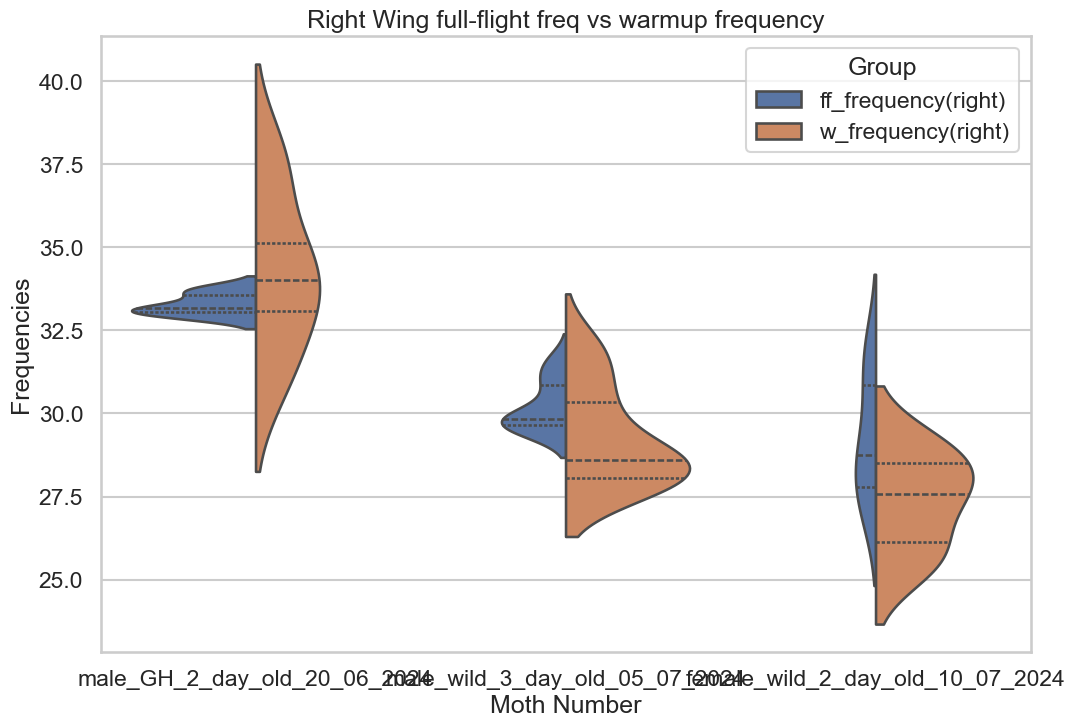

In [14]:
# generated by chatgpt

# Collect all data
all_data = []

for i in [0,3,4]:  # Assuming 7 moths
    violin_plot(i, 6, all_data)
    violin_plot(i, 6, all_data)

# Combine all data into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Plot all violins in a single figure
plt.figure(figsize=(12, 8))
ax = sns.violinplot(data=combined_df, x='moth_no', y='value', hue='group', split=True, inner='quartile')

# Adjust title and labels
plt.title("Right Wing full-flight freq vs warmup frequency")
plt.xlabel("Moth Number")
plt.ylabel("Frequencies")
plt.xticks([0,1,2], [moths_n1[0], moths_n1[3], moths_n1[4]])
# Fix the legend (optional if you want custom labels)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, [keys[6], keys[7]], title='Group')

plt.show()


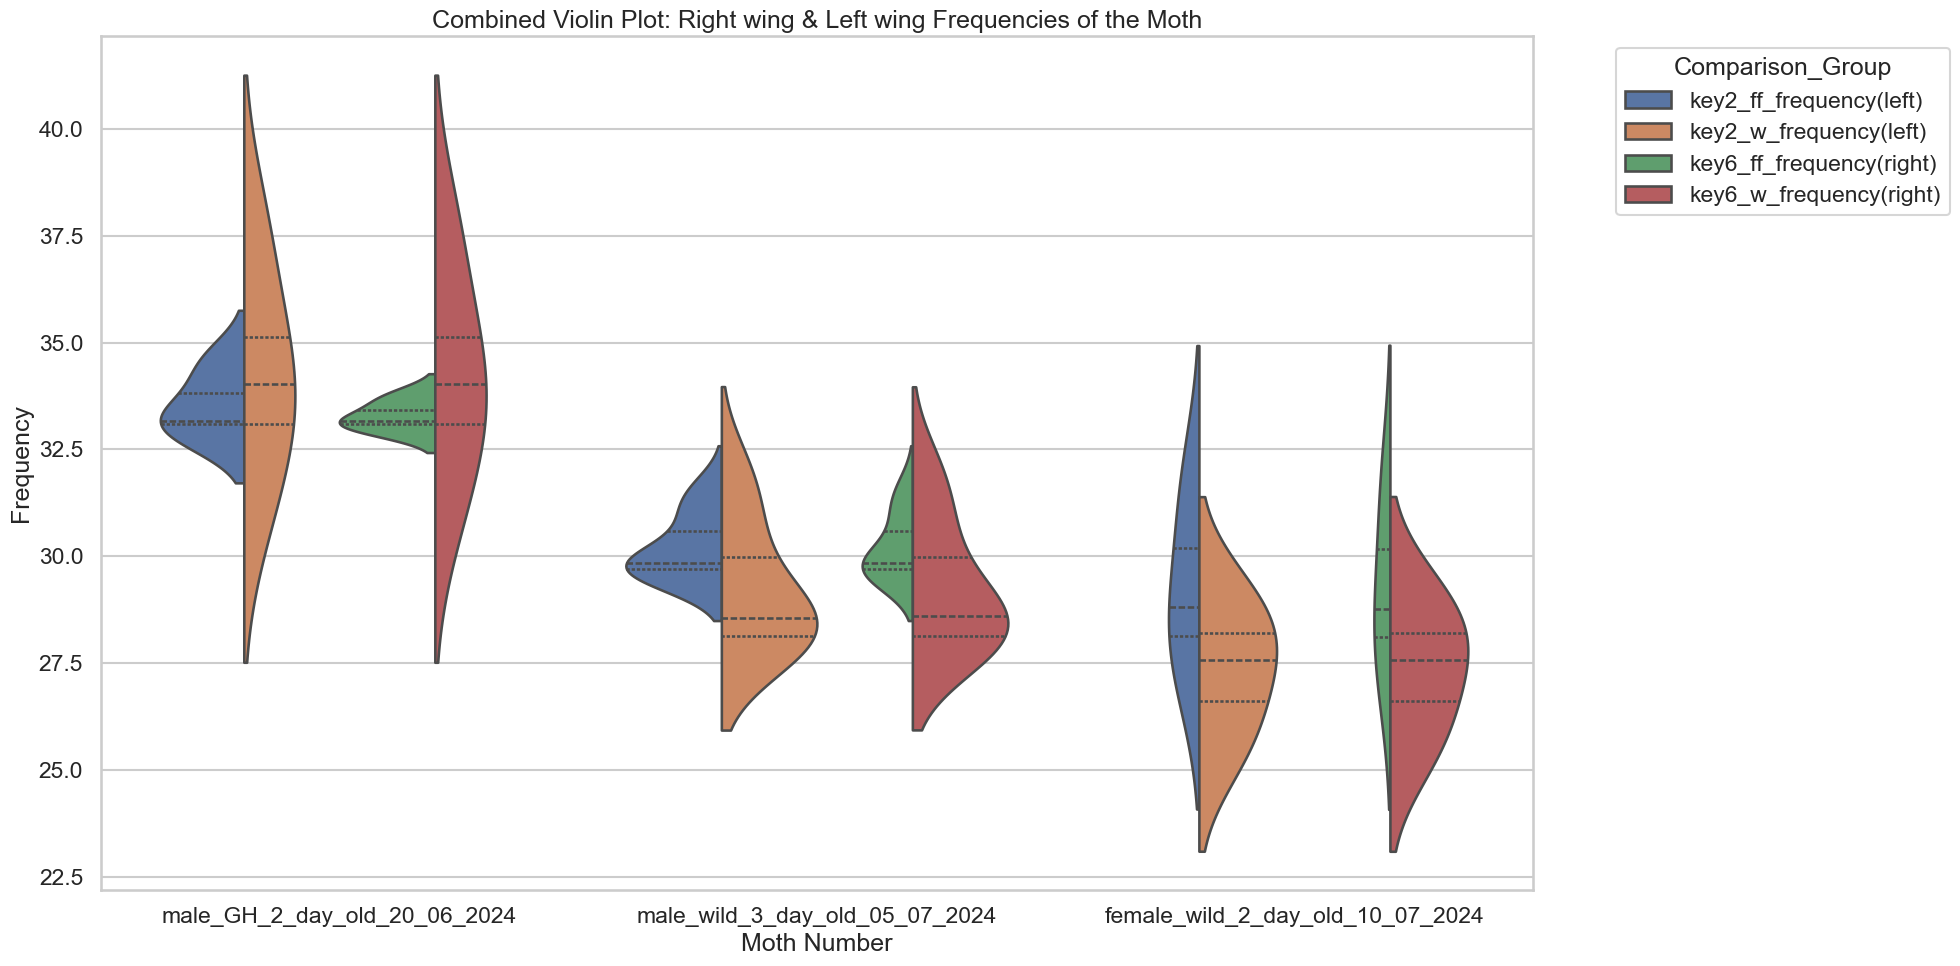

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def violin_plot(moth_no, key, label, all_data):
    data1 = moths_v1[moth_no][keys[key]]
    data2 = moths_v1[moth_no][keys[key + 1]]

    df = pd.DataFrame({
        'value': data1 + data2,
        'group': [keys[key]] * len(data1) + [keys[key + 1]] * len(data2),
        'moth_no': [moth_no] * (len(data1) + len(data2)),
        'comparison': [label] * (len(data1) + len(data2))
    })
    all_data.append(df)

# Collect all data
all_data = []
selected_moths = [0, 3, 4]

# Add data from both comparisons
for i in selected_moths:
    violin_plot(i, 2, "key2", all_data)
    violin_plot(i, 6, "key6", all_data)

# Combine data into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Combine 'comparison' and 'group' for unique hue
combined_df['hue'] = combined_df['comparison'] + "_" + combined_df['group']

# Plot
plt.figure(figsize=(20, 10))
ax = sns.violinplot(
    data=combined_df,
    x='moth_no',
    y='value',
    hue='hue',
    inner='quartile',
    split=True,
    dodge=True
)

# Custom x-tick labels
plt.xticks(ticks=range(len(selected_moths)), labels=[moths_n1[i] for i in selected_moths])
plt.title("Combined Violin Plot: Right wing & Left wing Frequencies of the Moth")
plt.xlabel("Moth Number")
plt.ylabel("Frequency")

# Adjust legend title for clarity
plt.legend(title="Comparison_Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('combined_violin_plot.tif', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


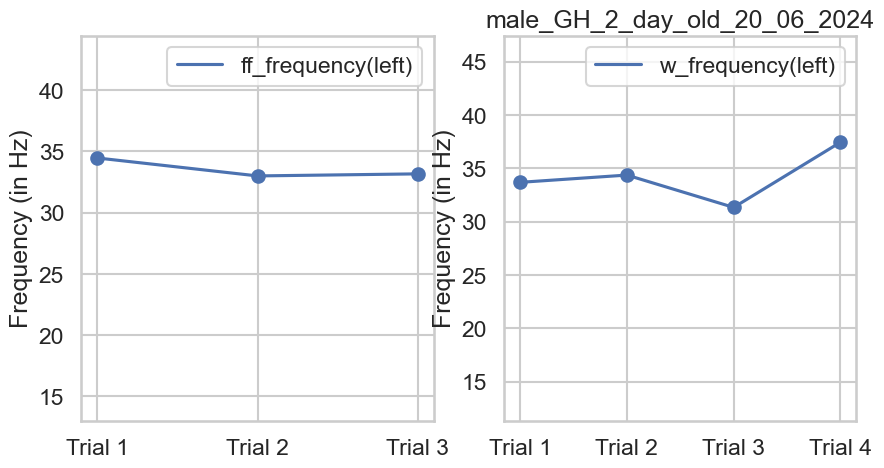

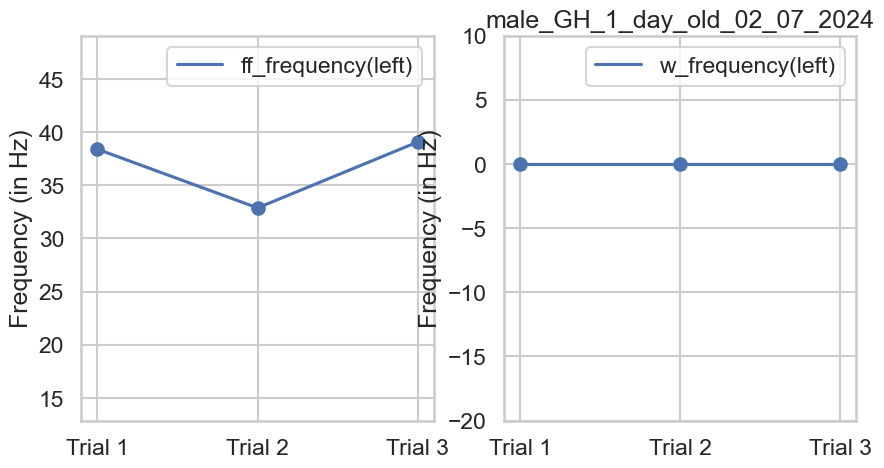

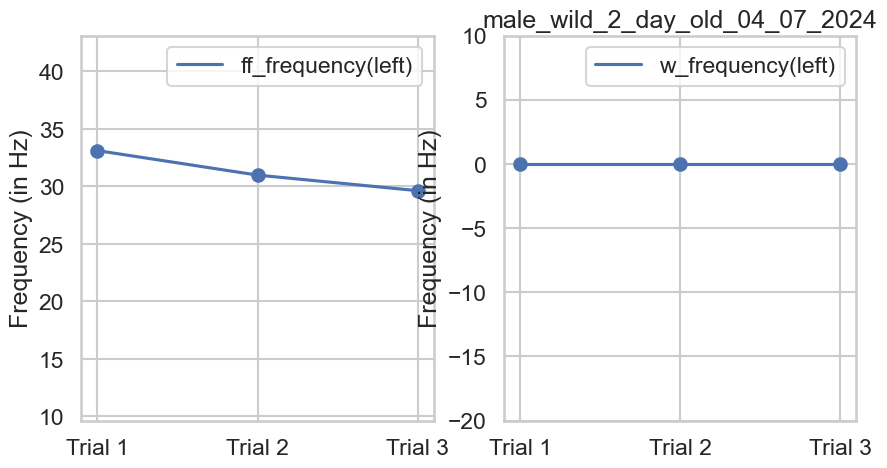

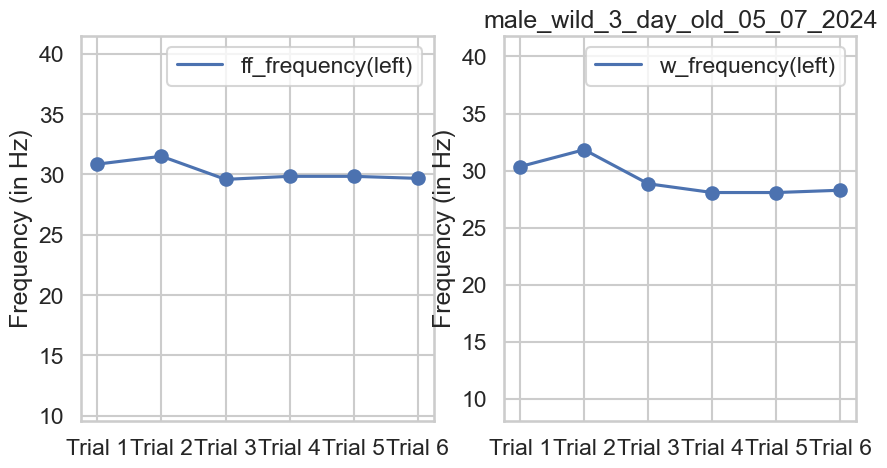

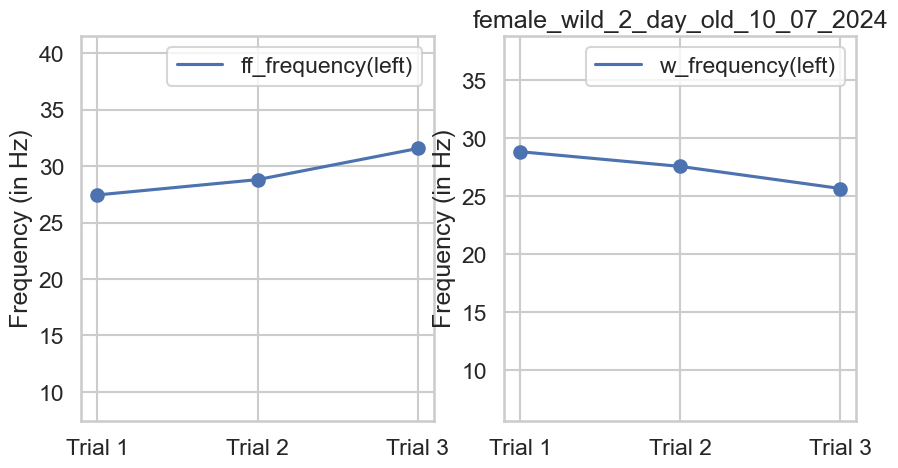

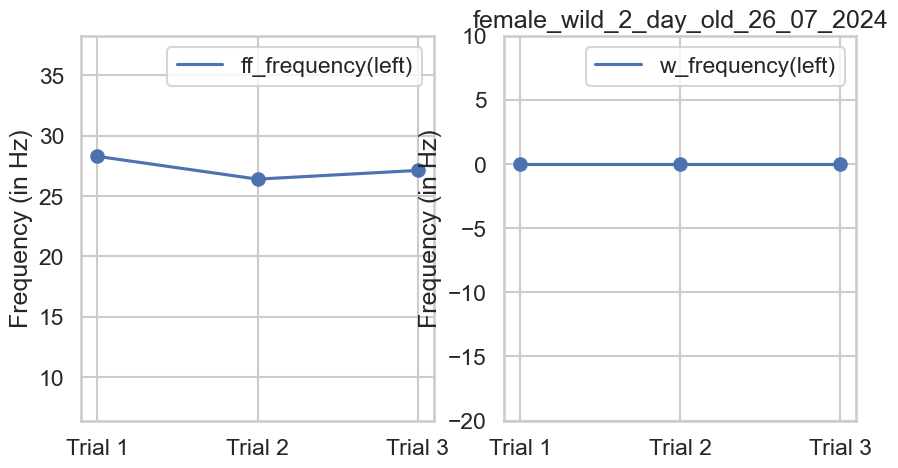

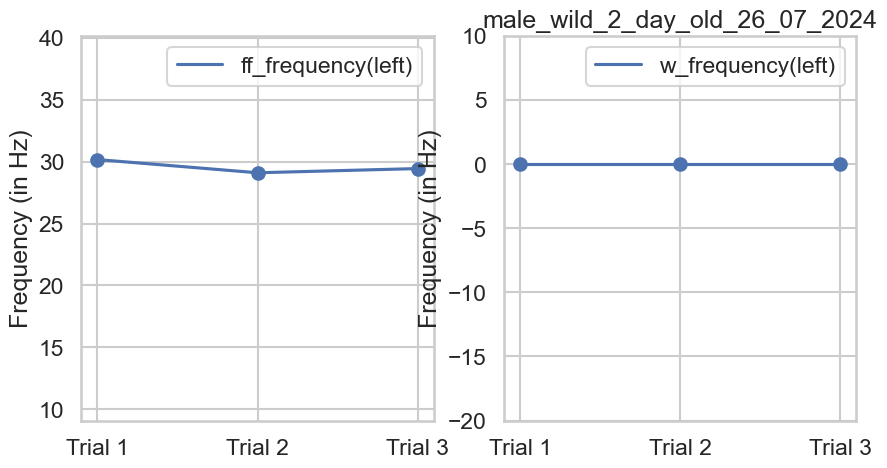

In [16]:
def indi_moth_plots(moth_no,key) :
    seed = moths_v1[moth_no][keys[key]]
    plt.plot(range(len(seed)),seed)
    plt.scatter(range(len(seed)),seed)
    plt.ylim(np.min(seed)-20, np.max(seed) + 10 )
    plt.legend([keys[key]])
    # plt.xlabel("Trial number")
    plt.ylabel("Frequency (in Hz)")
    plt.xticks(range(len(seed)), [f"Trial {i+1}" for i in range(len(seed))])


def side_by_side(moth_no) :
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    plt.sca(ax[0])
    indi_moth_plots(moth_no, 2)
    plt.sca(ax[1])
    indi_moth_plots(moth_no, 3)
    fig.savefig(f'left_{moths_n1[moth_no]}.tiff')

for i in range(7) :
    side_by_side(i)
    plt.title(f"{moths_n1[i]}")

In [17]:
columns_to_import = ['y_l', 'likelihood_l']

a = r'C:\analysis\app\assets\ncbs\3 day old wild male moth wingbeat freq,amplitude  5.7.24\airpuff flight(5sec) -warmup trial 4 20654DLC_resnet50_WBAJul8shuffle1_100000.csv'
def filter(csv_file,l):
    raw_data = pd.read_csv(csv_file)
    lh = raw_data[l].values
    #print(lh_r)
    index = np.where(lh>0.50)[0] # type: ignore
    return index

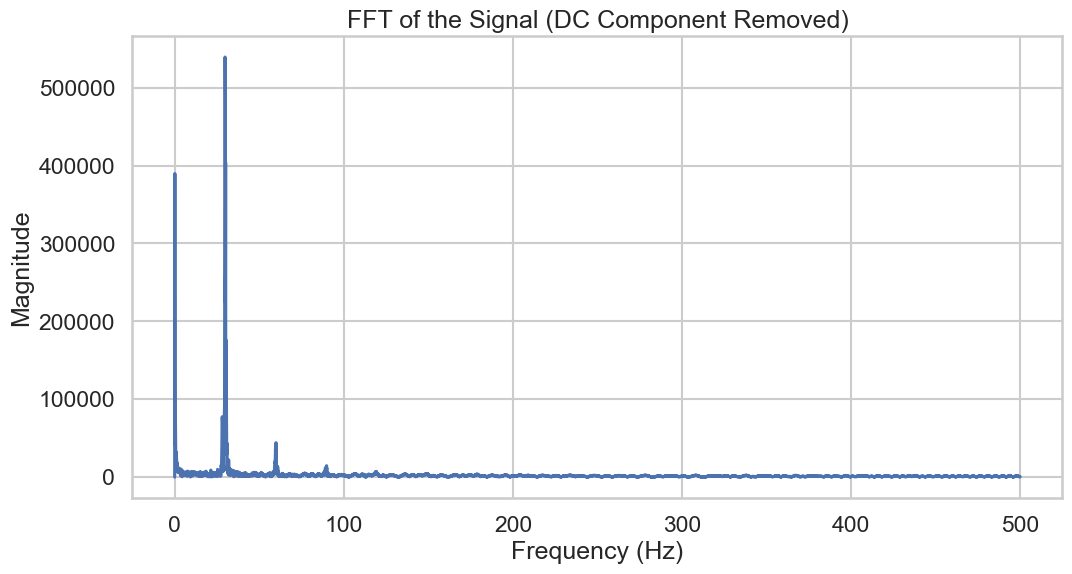

np.float64(29.792609748394568)

In [18]:
range = [1, 9500]

def process_data(csv_file, column, start_row=0, end_row=None, sampling_rate=1000):
    # Step 1: Read the CSV file
    data = pd.read_csv(csv_file)

    # Verify the column names and select the correct column
    # print("Available columns:", data.columns)
    
    # Ensure the correct column name is used
    values = data[column].values

    # Select the range of rows
    if end_row is None:
        end_row = len(values)
    
    values_range = values[range[0]:range[1]]

    # Remove the DC component by subtracting the mean
    values_detrended = values_range - np.mean(values_range)

    # Step 2: Apply FFT
    fft_result = np.fft.fft(values_detrended)
    fft_freq = np.fft.fftfreq(len(values_detrended), d=1/sampling_rate)

    # Step 3: Identify the dominant frequency
    fft_magnitude = np.abs(fft_result)

    # Only consider the positive frequencies for plotting
    positive_freqs = fft_freq[:len(fft_freq)//2]
    positive_magnitude = fft_magnitude[:len(fft_magnitude)//2]
    # print(positive_freqs)
    # print(positive_magnitude)
    # Plotting the FFT result (only positive frequencies)
    plt.figure(figsize=(12, 6))
    plt.plot(positive_freqs, positive_magnitude)
    plt.title('FFT of the Signal (DC Component Removed)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

    # Find the peak in the magnitude (positive frequencies only)
    f = positive_freqs[np.argmax(positive_magnitude)]
    if f < 50 and f > 10 :
        peak_freq = f
    else :
        sorted_freq = np.argsort(positive_magnitude)
        peak_freq = positive_freqs[sorted_freq[-2]]
    # print(type(peak_freq))
    # print(f'The dominant frequency is {peak_freq} Hz')
    return peak_freq

process_data(a, columns_to_import[0], start_row=range[0], end_row=range[1], sampling_rate=1000)

[array([   0,    1,    2, ..., 4129, 4130, 4131]), array([4132, 4133, 4134, ..., 8261, 8262, 8263]), array([ 8264,  8265,  8266, ..., 12393, 12394, 12395]), array([12396, 12397, 12398, ..., 16524, 16525, 16526]), array([16527, 16528, 16529, ..., 20655, 20656, 20657])]


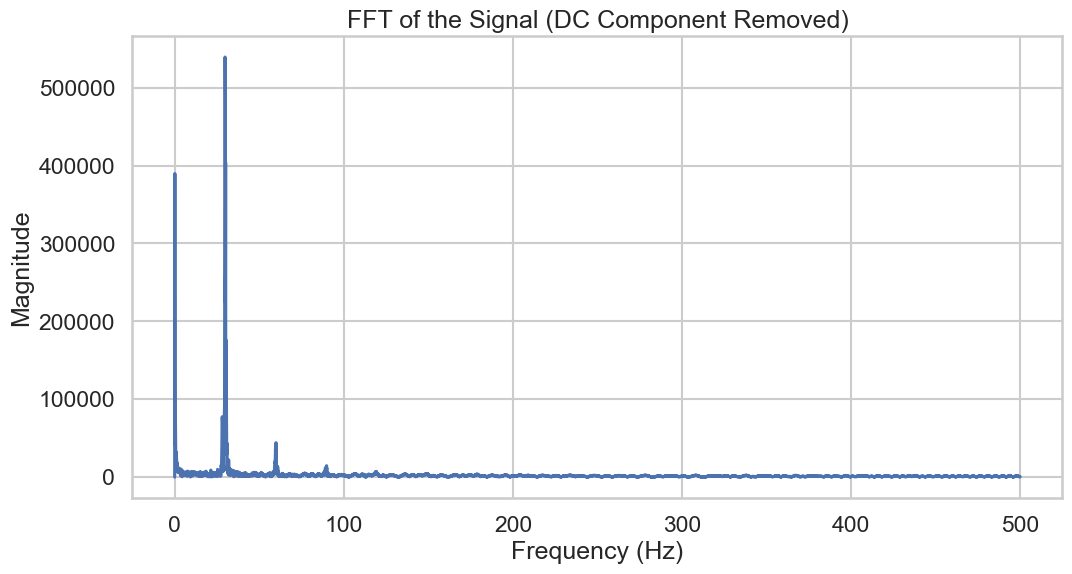

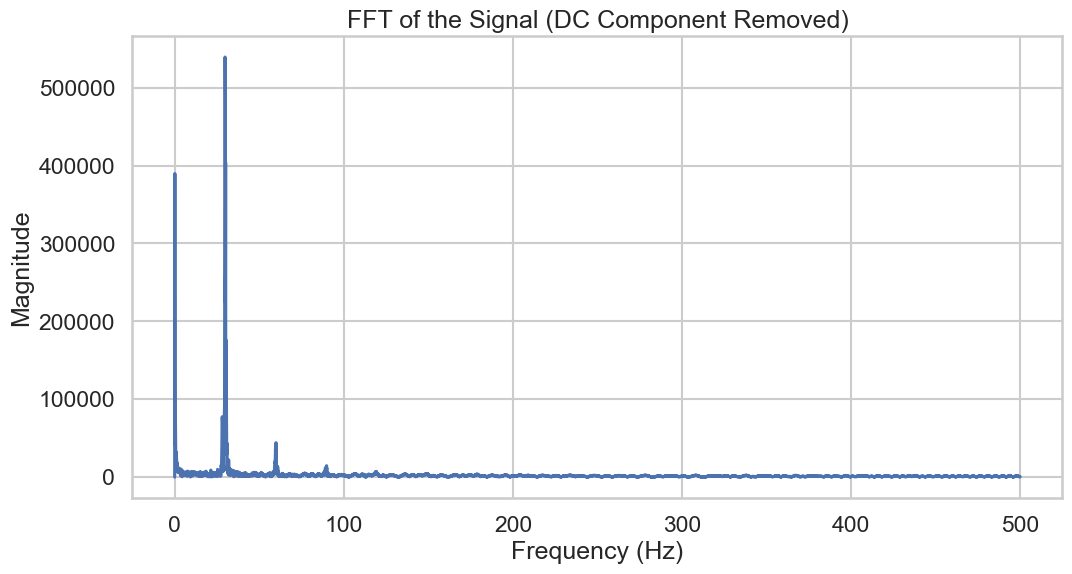

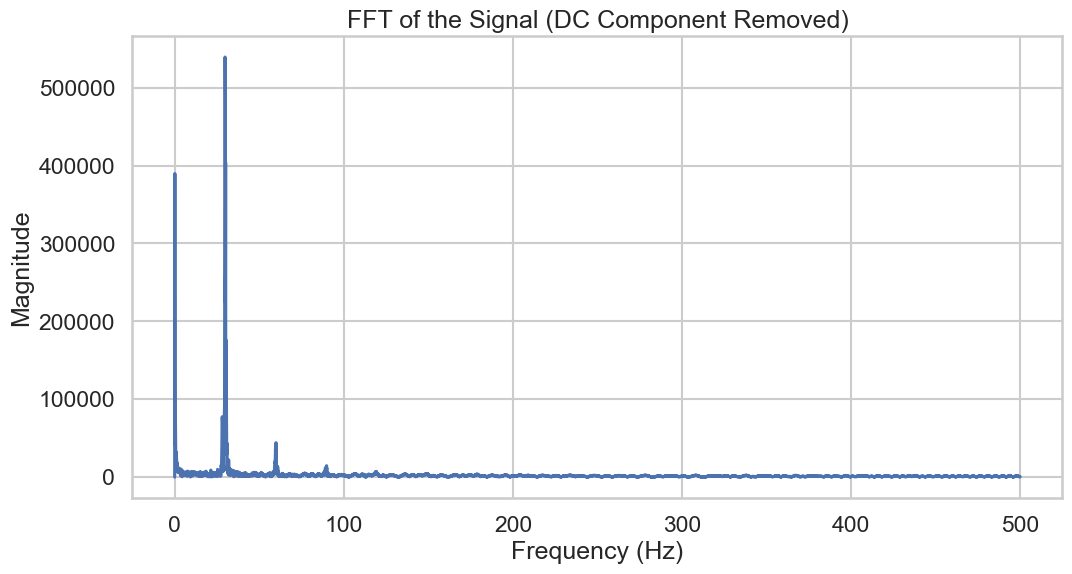

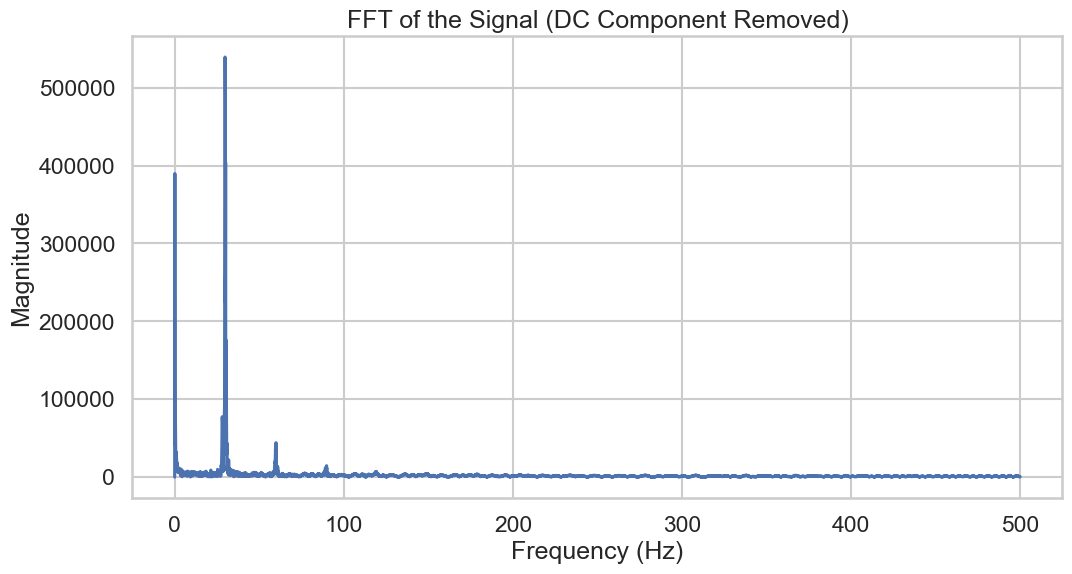

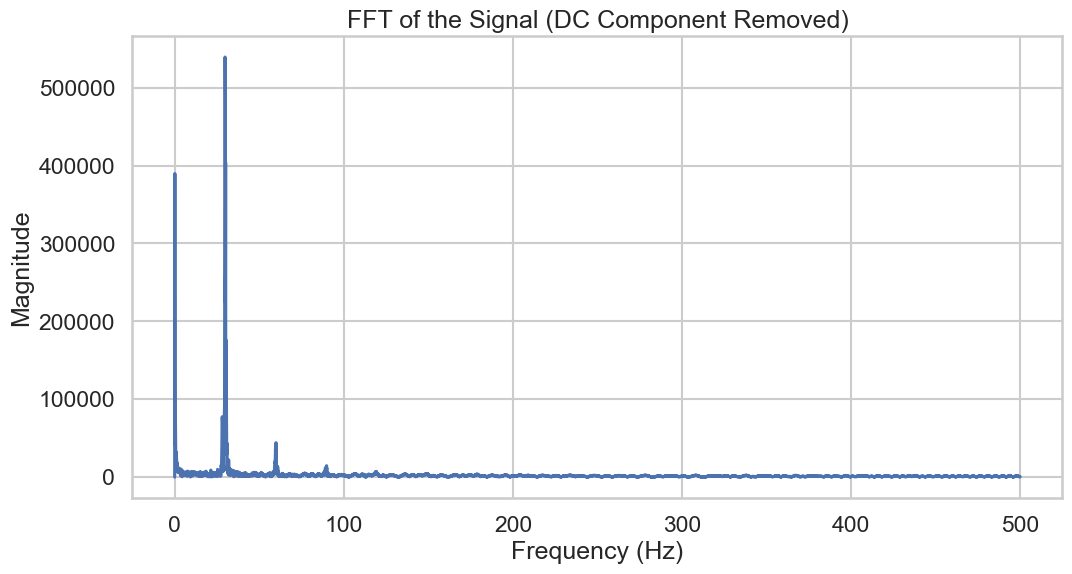

[np.float64(29.792609748394568), np.float64(29.792609748394568), np.float64(29.792609748394568), np.float64(29.792609748394568), np.float64(29.792609748394568)]


In [19]:
raw_data = pd.read_csv(a)
v = raw_data['coords'].values
frequencies = []
splits = np.array_split(v, 5)  # Split indices instead of values
print(splits)
for split in splits:
    start_row = split[0]
    end_row = split[-1] + 1  # Include the last index in the range
    f = process_data(a, columns_to_import[0], start_row=start_row, end_row=end_row, sampling_rate=1000)
    frequencies.append(f)
print(frequencies)

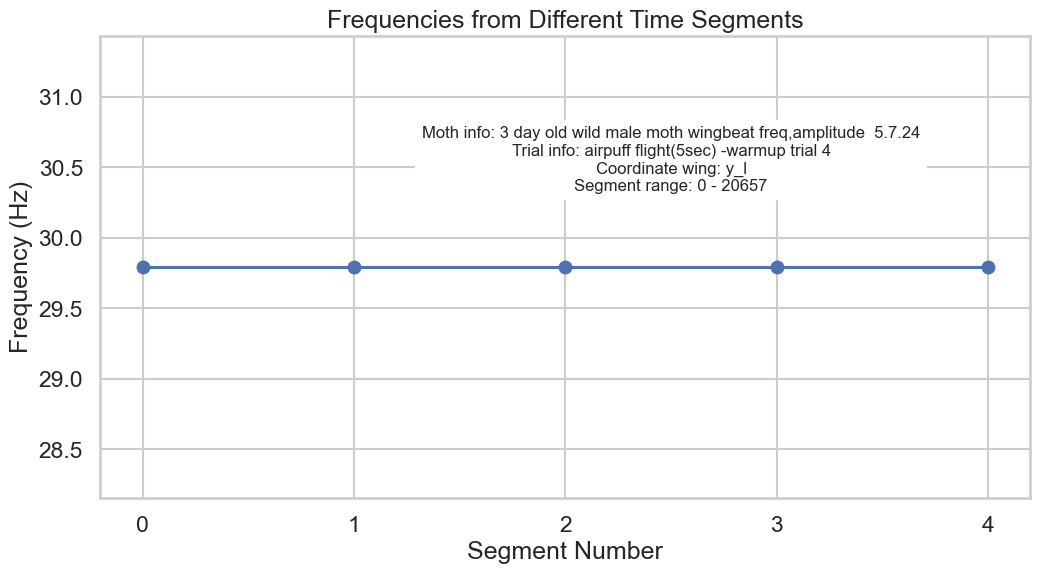

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'a' is the full path to the input file
b = os.path.basename(a)                          # e.g., trial1_coords.csv
c = os.path.basename(os.path.dirname(a))         # e.g., Moth_001
save_dir = os.path.dirname(a)                    # Directory where input file is

# Safe name construction
filename = f"{b[:-45]}_{columns_to_import[0]}_segment_range_{splits[0][0]}-{splits[-1][-1]}.tif"
save_path = os.path.join(save_dir, filename)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(frequencies)), frequencies, marker='o')
plt.title('Frequencies from Different Time Segments')

# Annotate with info box
info_text = (
    f"Moth info: {c}\n"
    f"Trial info: {b[:-45]}\n"
    f"Coordinate wing: {columns_to_import[0]}\n"
    f"Segment range: {splits[0][0]} - {splits[-1][-1]}"
)

plt.text(
    len(frequencies)/2, max(frequencies) + 1,
    info_text,
    fontsize=12,
    ha='center',
    va='top',
    bbox=dict(facecolor='white', alpha=1)
)

plt.xlabel('Segment Number')
plt.ylabel('Frequency (Hz)')
plt.xticks(np.arange(len(frequencies)))
plt.grid(True)

# Save the plot in the same folder as the input file
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

